<a href="https://colab.research.google.com/github/EduHdzVillasana/Procesamiento_MCD/blob/main/Tarea_1/Tarea_1_Los_de_Abajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tarea 1: Procesamiento y Clasificación de Datos
## Alumno: Eduardo Alan Hernandez Villasana
## Matricula: 1941416



In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import string
import re
import pandas as pd

In [2]:
# https://github.com/raduangelescu/gutenbergpy
!pip install gutenbergpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 14.0 MB/s eta 0:00:00
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29250 sha256=d332a7a6b7f4ef4cc2d964c98cefef062fdf43dfb42f7e3643c9ac0850a5ed83
  Stored in directory: /root/.cache/pip/wheels/e6/5c/6b/790df3d7037e3d9aaf7a48d563626941f2f60198d2f1eef8d2
Successfully built httpsproxy-urllib2


In [3]:
from gutenbergpy import textget

In [4]:
def obtener_libro(id = 549):
    raw_book = textget.get_text_by_id(id) # with headers
    clean_book = textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book

In [7]:
def tokens(text):
    texto_limpio = re.sub(r'[^\w\s]', '', text.lower())

    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(texto_limpio)
    texto_filtrado = [word for word in tokens if word not in stop_words]
    return texto_filtrado

In [6]:
def analyze_frequencies(tokens):
    stemmer = PorterStemmer()
    processed_tokens = [stemmer.stem(token) for token in tokens]

    frequencies = Counter(processed_tokens)
    return frequencies

In [8]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
clean_text, raw_text = obtener_libro()
str_libro = clean_text.decode()
list_libro = str_libro.split("\n")
filter_libro = list(filter(None, list_libro))
map_libro = list(map(tokens, filter_libro))

In [10]:
tokens = []
for token in map_libro:
    tokens.extend(token)

In [11]:
freq_stem = analyze_frequencies(tokens)

In [12]:
print("\nFrecuencias con STEM:")
for word, freq in freq_stem.most_common(10):
    print(f"{word}: {freq}")


Frecuencias con STEM:
demetrio: 323
said: 163
like: 154
men: 123
go: 123
cervant: 119
man: 118
one: 113
know: 111
dont: 107


In [13]:
df_frecuency = pd.DataFrame(list(freq_stem.items()), columns=['Word', 'Frequency'])
df_frecuency = df_frecuency.sort_values(by='Frequency', ascending=False)
df_frecuency.head(10)

,Word,Frequency
180,demetrio,323
138,said,163
40,like,154
284,go,123
255,men,123
1249,cervant,119
154,man,118
132,one,113
379,know,111
323,dont,107


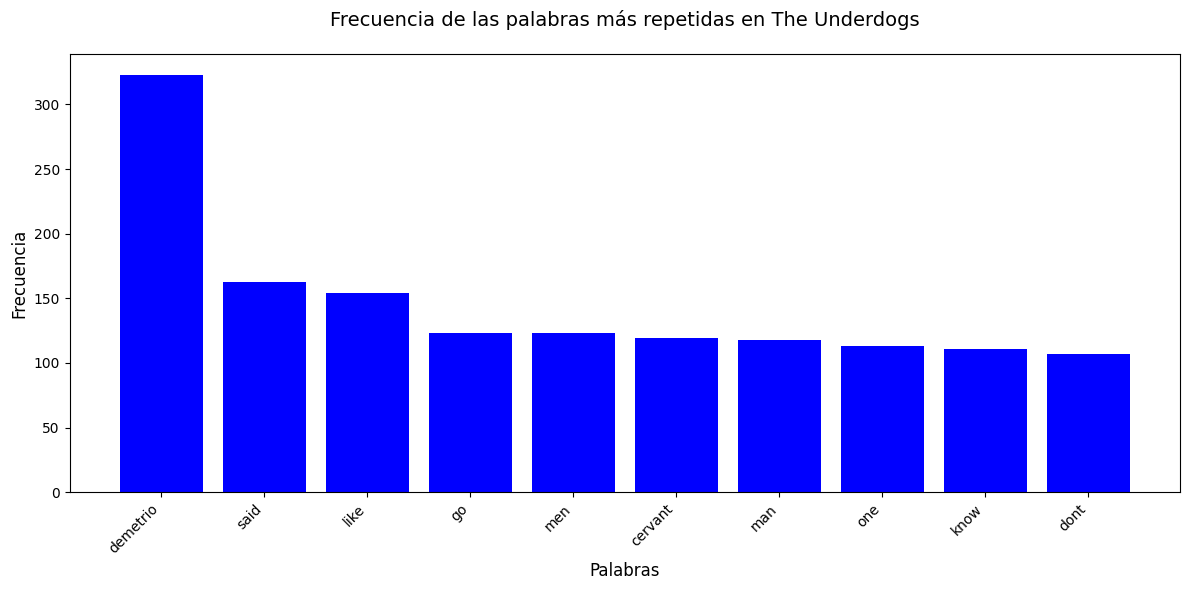

In [14]:
import matplotlib.pyplot as plt
df = df_frecuency.head(10)
plt.figure(figsize=(12, 6))
plt.bar(df['Word'], df['Frequency'], color='blue')
plt.title('Frecuencia de las palabras más repetidas en The Underdogs',
            fontsize=14, pad=20)
plt.xlabel('Palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

In [15]:
from wordcloud import WordCloud

In [16]:
wordcloud = WordCloud().generate(' '.join(tokens))

(-0.5, 399.5, 199.5, -0.5)

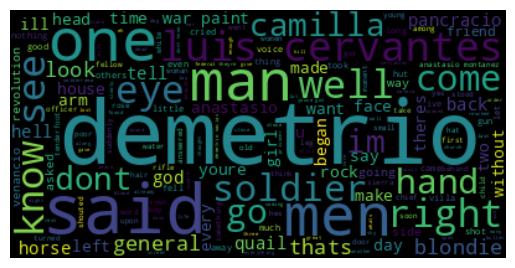

In [17]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [18]:
def generate_ngrams(text, n):
    from nltk import ngrams
    import networkx as nx
    lsita_bigramas = list(ngrams(text.split(), n))

    G = nx.DiGraph()

    for gram in lsita_bigramas:
        G.add_edge(gram[0], gram[1])

    plt.figure(figsize=(10, 6))
    nx.draw(G, with_labels=True, node_size=3000, font_size=14)
    plt.title("Grafo de Bigramas")
    plt.show()

In [19]:
frases = filter_libro[215:225]

In [20]:
frases

['"By God, if I don\'t own a Mauser and a lot of cartridges, if I can\'t',
 "get a pair of trousers and shoes, then my name's not Anastasio",
 "Montanez! Look here, Quail, you don't believe it, do you? You ask my",
 "partner Demetrio if I haven't half a dozen bullets in me already.",
 'Christ! Bullets are marbles to me! And I dare you to contradict me!"',
 '"Viva Anastasio Montanez," shouted Manteca.',
 '"All right, all right!" said Montanez. "Viva Demetrio Macias, our',
 'chief, and long life to God in His heaven and to the Virgin Mary."',
 '"Viva Demetrio Macias," they all shouted.',
 'They gathered dry brush and wood, built a fire and placed chunks of']

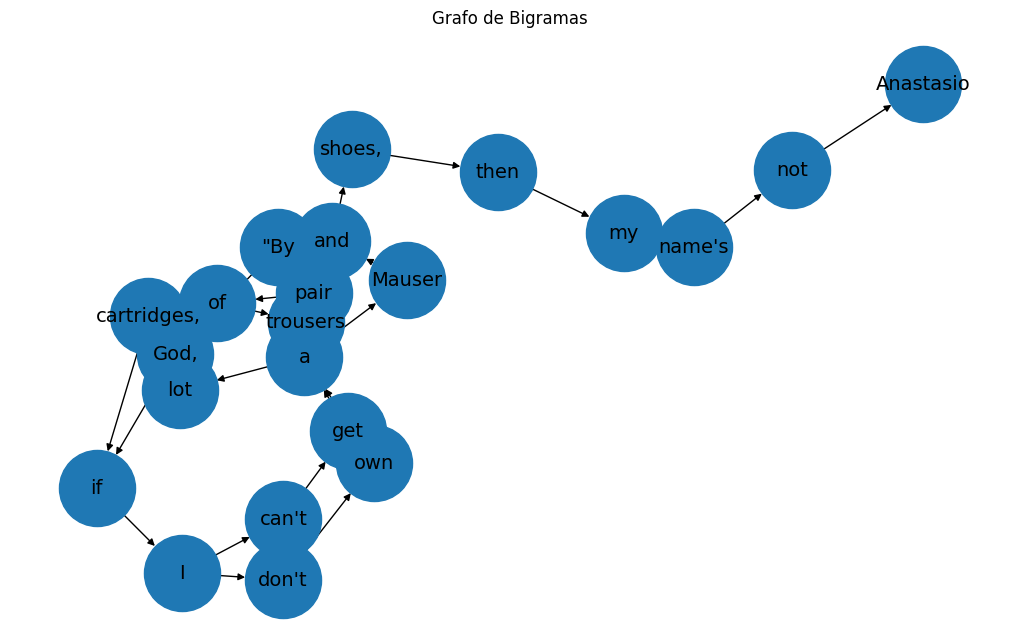

In [21]:
generate_ngrams(' '.join(frases[:2]), 2)